In [1]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: rapidfuzz
    Found existing installation: rapidfuzz 3.1.1
    Uninstalling rapidfuzz-3.1.1:
      Successfully uninstalled rapidfuzz-3.1.1


In [2]:
# !pip install gdown

In [3]:
!pip install tensorflow-io

In [4]:
import os

os.environ['KMP_SETTINGS'] = 'false'

In [5]:
from shutil import rmtree

# from google.colab import drive
# import gdown
from IPython.display import display, Audio
import jiwer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Bidirectional
from tensorflow.keras.layers import Conv2D, Dense, Dropout, GRU, Input
from tensorflow.keras.layers import LSTM, ReLU, Reshape, StringLookup
import tensorflow_io as tfio

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [6]:
def create_directory_if_not_exists(directory_path: str) -> None:
    assert directory_path is not None
    assert len(directory_path) != 0
    if os.path.isdir(directory_path):
        print(directory_path, 'exists, so it doesn\'t need to be created')
    else:
        os.makedirs(directory_path)
        print(directory_path, 'didn\'t exists and has just created')

# drive.mount('/content/drive')

DATA_PATH = '/kaggle/working'
create_directory_if_not_exists(DATA_PATH)

/kaggle/working exists, so it doesn't need to be created


In [7]:
# url = 'https://drive.google.com/uc?id=1-1JqAcxUPUNyTF4tKmvQZ-RVR3GGrJlV'
# zip_path = DATA_PATH + '/datato2.zip'
# gdown.download(url, zip_path, quiet=False)

In [8]:
# url = 'https://drive.google.com/uc?id=1YV86EDntW_CUrkZzcuiXntf60BkymWsD'
# csv_path = DATA_PATH + '/metadata02.csv'
# gdown.download(url, csv_path, quiet=False)

In [10]:
print(DATA_PATH)
!ls {DATA_PATH}

/kaggle/working
__notebook_source__.ipynb


In [ ]:
# assert os.path.exists(zip_path)
# assert os.path.exists(csv_path)

# unzip_path = DATA_PATH + '/datato2_unzipped'

# if os.path.isdir(unzip_path):
#     rmtree(unzip_path)
# os.makedirs(unzip_path)

# !unzip -q {zip_path} -d {unzip_path}

In [ ]:
# !ls {unzip_path}/content/data/datato2/wavs/1

In [11]:
keras.utils.get_file(
    origin='https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2',
    untar=True,
    cache_dir=DATA_PATH
)

2748572632/2748572632 [==============================] - 58s 0us/step


'/kaggle/working/datasets/LJSpeech-1.1.tar.bz2'

In [19]:
!ls {DATA_PATH}/datasets/LJSpeech-1.1
!ls -U {DATA_PATH}/datasets/LJSpeech-1.1/wavs | head -5
!head -n 5 {DATA_PATH}/datasets/LJSpeech-1.1/metadata.csv

README	metadata.csv  wavs
LJ015-0217.wav
LJ020-0019.wav
LJ039-0224.wav
LJ004-0069.wav
LJ024-0102.wav
ls: write error: Broken pipe
LJ001-0001|Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition|Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition
LJ001-0002|in being comparatively modern.|in being comparatively modern.
LJ001-0003|For although the Chinese took impressions from wood blocks engraved in relief for centuries before the woodcutters of the Netherlands, by a similar process|For although the Chinese took impressions from wood blocks engraved in relief for centuries before the woodcutters of the Netherlands, by a similar process
LJ001-0004|produced the block books, which were the immediate predecessors of the true printed book,|produced the block books, which were the immediate predece

In [22]:
unzip_path = f'{DATA_PATH}/datasets/LJSpeech-1.1/wavs'
csv_path = f'{DATA_PATH}/datasets/LJSpeech-1.1/metadata.csv'

print(unzip_path)
print(csv_path)

/kaggle/working/datasets/LJSpeech-1.1/wavs
/kaggle/working/datasets/LJSpeech-1.1/metadata.csv


In [32]:
metadata = pd.read_csv(csv_path, sep='|', header=None, quoting=3)
metadata.columns = ['key', 'original_text', 'text']
metadata.key = [f'{unzip_path}/{key}.wav' for key in metadata.key]
metadata = metadata.drop(columns='original_text')

display(Audio(metadata.key.iloc[0]))
print('Metadata row count:', len(metadata))
metadata.head(3)

Metadata row count: 13100


,key,text
0,/kaggle/working/datasets/LJSpeech-1.1/wavs/LJ0...,"Printing, in the only sense with which we are ..."
1,/kaggle/working/datasets/LJSpeech-1.1/wavs/LJ0...,in being comparatively modern.
2,/kaggle/working/datasets/LJSpeech-1.1/wavs/LJ0...,For although the Chinese took impressions from...


In [34]:
temp = 100
try:
    item = metadata.iloc[temp]
    print(temp, item.key)
    print(item.text)
    display(Audio(item.key))
except Exception as err:
    print(err, f'Index {temp} not found in metadata')

100 /kaggle/working/datasets/LJSpeech-1.1/wavs/LJ001-0101.wav
It is discouraging to note that the improvement of the last fifty years is almost wholly confined to Great Britain.


Dữ liệu hiện có khoảng 7 giờ 48 phút âm thanh.

Đây là phần dữ liệu sẽ được chia thành tập training, validation và tesing, theo tỷ lệ 80/10/10.

Train qua 50 epoch.

In [35]:
# The random_state value should never be changed

train_metadata, valid_metadata, test_metadata = np.split(
    metadata.sample(frac=1, random_state=230713),
    [int(0.8 * len(metadata)), int(0.9 * len(metadata))]
)

print('Number of rows in training   metadata:', len(train_metadata))
print('Number of rows in validation metadata:', len(valid_metadata))
print('Number of rows in testing    metadata:', len(test_metadata))

Number of rows in training   metadata: 10480
Number of rows in validation metadata: 1310
Number of rows in testing    metadata: 1310


In [37]:
train_metadata.head(3)

,key,text
6093,/kaggle/working/datasets/LJSpeech-1.1/wavs/LJ0...,Only a very small minority of the people of th...
1244,/kaggle/working/datasets/LJSpeech-1.1/wavs/LJ0...,Religious worship became more generally the ru...
3833,/kaggle/working/datasets/LJSpeech-1.1/wavs/LJ0...,"Her husband, to whom she coolly confided her i..."


Chuẩn bị bộ ký tự để chuyển đổi từ ký tự sang giá trị số.

In [38]:
char_list = [
    '-', ' ', 'E', 'T', 'A',
    'O', 'N', 'I', 'H', 'S',
    'R', 'D', 'L', 'U', 'M',
    'W', 'C', 'F', 'G', 'Y',
    'P', 'B', 'V', 'K', "'",
    'X', 'J', 'Q', 'Z', '?',
    '!', '.', ','
]

# Maps character to integer
char_to_int = StringLookup(
    vocabulary=char_list,
    oov_token=''
)

# Maps integer to character
int_to_char = StringLookup(
    vocabulary=char_to_int.get_vocabulary(),
    oov_token='',
    invert=True
)

print(f'There are {char_to_int.vocabulary_size()} characters in total')

There are 34 characters in total


Mỗi mẫu dữ liệu bao gồm đường dẫn đến file WAV (wav_file) và label (label) sẽ được biến đổi để phù hợp với model:

- Dữ liệu âm thanh được đọc từ file thành tensor, rồi được chuyển sang dạng spectrogram. Dữ liệu spectrogram sẽ được chuẩn hóa.
- Label sẽ được chuyển từ văn bản thành mảng số.

In [39]:
frame_length =  128     # The window length in each sample
frame_step =    160     # The number of samples to step
fft_length =    384     # The size of FFT to apply.
                        # If not provided, uses the smallest power of 2 enclosing frame_length

def encode_input(wav_file, label):
    '''
    Processes the audio file (WAV)
    '''

    global frame_length
    global frame_step
    global fft_length

    ############## AUDIO ##############

    # Reads the WAV file
    file_data = tf.io.read_file(wav_file)

    # Decodes the WAV file
    audio_data, sample_rate = tf.audio.decode_wav(file_data)   # A float tensor
    audio_data = tf.squeeze(audio_data, axis=-1)          # Removes all dimension with size 1

    # Type-casts to float
    audio_data = tf.cast(audio_data, tf.float32)
    sample_rate = tf.cast(sample_rate, tf.float32)
    
    # Calculate the spectrogram
    # STFT stands for Short time Fourier transform
    spectrogram = tf.signal.stft(
        audio_data, frame_length=frame_length,
        frame_step=frame_step, fft_length=fft_length
    )
    spectrogram = tf.cast(spectrogram, tf.float32)
    
    # Convert to mel-spectrogram
    mel_spectrogram = tfio.audio.melscale(
        spectrogram, rate=sample_rate, mels=193, fmin=0, fmax=8000
    )
    
    # Convert to db scale mel-spectrogram
    dbscale_mel_spectrogram = tfio.audio.dbscale(
        mel_spectrogram, top_db=80)

    # Calculate the magnitude
    dbscale_mel_spectrogram = tf.abs(dbscale_mel_spectrogram)
    dbscale_mel_spectrogram = tf.math.pow(dbscale_mel_spectrogram, 0.5)

    # Normalize
    means = tf.math.reduce_mean(dbscale_mel_spectrogram, axis=1, keepdims=True)
    std_devs = tf.math.reduce_std(dbscale_mel_spectrogram, axis=1, keepdims=True)
    dbscale_mel_spectrogram = (dbscale_mel_spectrogram - means) / (std_devs + 1e-10)

    ########### LABEL (TEXT) ###########

    # Convert the label to uppercase
    label = tf.strings.upper(label)

    # Split the label by blank characters (whitespaces, tabs etc.)
    label = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Maps each character in label to a number
    label = char_to_int(label)

    # Returns the decibel-scale mel spectrogram's result and the label, as our model need two inputs to train
    return dbscale_mel_spectrogram, label

Tạo đối tượng `tf.data.Dataset` từ metadata (theo tập train, valid và test).

In [41]:
batch_size = 32

# Creates trainning, validation and testing datasets
train_dataset, valid_dataset, test_dataset = [
    tf.data.Dataset.from_tensor_slices(
        (list(df['key']), list(df['text']))
    ).map(encode_input, num_parallel_calls=tf.data.AUTOTUNE)
        .padded_batch(batch_size)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
    for df in [train_metadata, valid_metadata, test_metadata]
]

print('Number of batches in training   dataset:', len(train_dataset))
print('Number of batches in validation dataset:', len(valid_dataset))
print('Number of batches in testing    dataset:', len(test_dataset))

Number of batches in training   dataset: 328
Number of batches in validation dataset: 41
Number of batches in testing    dataset: 41


Trực quan hóa dữ liệu

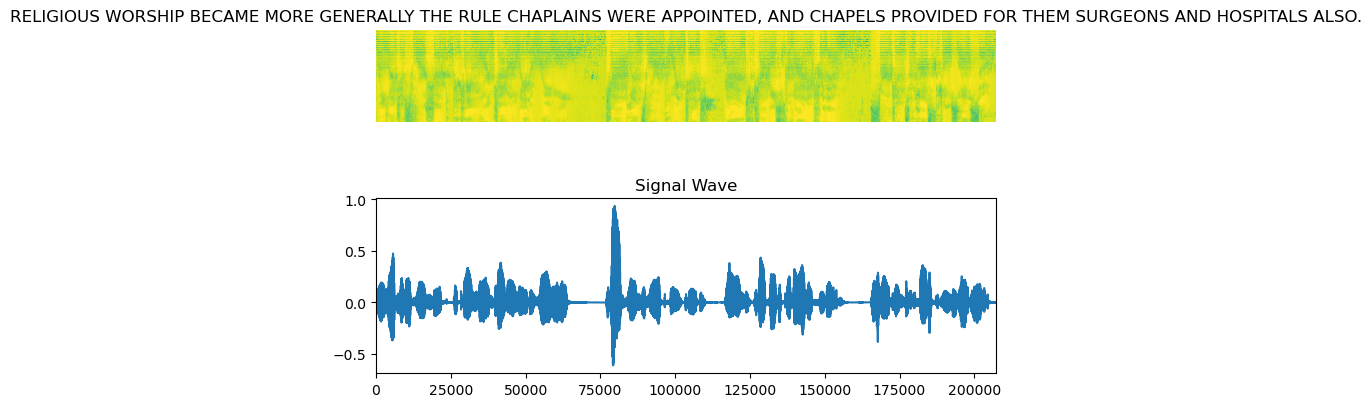

In [42]:
temp = 1

fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][temp].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][temp]

    # Spectrogram
    label = tf.strings.reduce_join(int_to_char(label)).numpy().decode('UTF-8')
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis('off')

    # WAV
    file_data = tf.io.read_file(list(train_metadata['key'])[temp])
    audio, sample_rate = tf.audio.decode_wav(file_data)
    sample_rate = float(tf.cast(sample_rate, tf.float32))
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title('Signal Wave')
    ax.set_xlim(0, len(audio))
    display(Audio(np.transpose(audio), rate=sample_rate))
plt.show()

## Model for you

CTC Loss

In [43]:
def ctc_loss(target, prediction):
    '''
    Computes the CTC loss value while training
    '''

    batch_size = tf.cast(tf.shape(target)[0], dtype='int64')
    input_size = tf.cast(tf.shape(prediction)[1], dtype='int64')
    label_size = tf.cast(tf.shape(target)[1], dtype='int64')

    temp = tf.ones(shape=(batch_size, 1), dtype='int64')
    input_size = input_size * temp
    label_size = label_size * temp

    loss = keras.backend.ctc_batch_cost(target, prediction, input_size, label_size)
    return loss

Model (theo báo cáo)

In [48]:
def build_model(input_dim, output_dim, n_rnn_layers=5, n_rnn_units=128, lr=1e-4):
    '''
    A model inspired by Deep Speech 2
    '''

    # Input
    spectrogram = Input((None, input_dim), name='input')

    # Expand the dimension to use Conv2D
    x = Reshape((-1, input_dim, 1), name='expand_dim')(spectrogram)

    # CNN 1
    x = Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding='same',
        use_bias=False,
        name='conv_1'
    )(x)
    x = BatchNormalization(name='conv_1_bn')(x)
    x = ReLU(name='conv_1_relu')(x)

    # CNN 2
    x = Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding='same',
        use_bias=False,
        name='conv_2'
    )(x)
    x = BatchNormalization(name='conv_2_bn')(x)
    x = ReLU(name='conv_2_relu')(x)

    # Reshape the resulted volume to feed ththe layers of RNN
    x = Reshape((-1, x.shape[-2] * x.shape[-1]))(x)

    # RNN
    for i in range(1, n_rnn_layers + 1):
        recurrent = LSTM(
            units=n_rnn_units,
            activation='tanh',
            recurrent_activation='sigmoid',
            use_bias=True,
            return_sequences=True,
            #             reset_after=True,
            name=f'lstm_{i}'
        )
        x = Bidirectional(
            recurrent, name=f'bidirectional_{i}', merge_mode='concat'
        )(x)
        if i != n_rnn_layers:
            x = Dropout(rate=0.5)(x)

    # Dense
    x = Dense(units=n_rnn_units * 2, name='dense_1')(x)
    x = ReLU(name='dense_1_relu')(x)
    x = Dropout(rate=0.5)(x)

    # Classification
    output = Dense(units=output_dim + 1, activation='softmax')(x)

    # Model
    model = keras.Model(spectrogram, output, name='model')

    # Optimizer
    optim = keras.optimizers.Adam(learning_rate=lr)

    # Compile the model
    model.compile(optimizer=optim, loss=ctc_loss)
    return model

Tạo model

In [49]:
model = None
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_int.vocabulary_size(),
    n_rnn_units=512
)

model.summary(line_length=80)

Model: "model"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 input (InputLayer)                 [(None, None, 193)]             0           
                                                                                
 expand_dim (Reshape)               (None, None, 193, 1)            0           
                                                                                
 conv_1 (Conv2D)                    (None, None, 97, 32)            14432       
                                                                                
 conv_1_bn (BatchNormalization)     (None, None, 97, 32)            128         
                                                                                
 conv_1_relu (ReLU)                 (None, None, 97, 32)            0           
                                                                                
 conv_2 (Conv

## Train and validate

In [50]:
def decode_batch_predictions(predictions):
    input_length = np.ones(predictions.shape[0]) * predictions.shape[1]

    # Greedy search
    results = keras.backend.ctc_decode(predictions, input_length=input_length, greedy=True)[0][0]

    output_texts = [
        tf.strings.reduce_join(int_to_char(result)).numpy().decode('UTF-8')
        for result in results
    ]

    return output_texts


class Evaluator(keras.callbacks.Callback):
    '''
    A callback class output a few transcriptions during training.
    Display a batch of outputs after each epoch.
    '''

    def __init__(self, dataset):
        super(Evaluator, self).__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []

        iterator = None
        iterator = iter(self.dataset)
        batch_count = 0

        while True:
            try:
                X, y = iterator.get_next()
                batch_predictions = model.predict(X, verbose=0)
                batch_predictions = decode_batch_predictions(batch_predictions)
                predictions.extend(batch_predictions)
                for label in y:
                    label = tf.strings.reduce_join(int_to_char(label)).numpy().decode('UTF-8')
                    targets.append(label)
            except tf.errors.OutOfRangeError:
                break

        # for batch in self.dataset:
        #     X, y = batch
        #     batch_predictions = model.predict(X, verbose=0)
        #     batch_predictions = decode_batch_predictions(batch_predictions)
        #     predictions.extend(batch_predictions)
        #     for label in y:
        #         label = tf.strings.reduce_join(int_to_char(label)).numpy().decode('UTF-8')
        #         targets.append(label)

        wer_score = jiwer.wer(targets, predictions)
        print('-' * 100)
        print(f'WER: {wer_score:.2%}')
        for i in np.random.randint(0, len(predictions), 2):
            print(f'Target    : {targets[i]}')
            print(f'Prediction: {predictions[i]}')
        print('-' * 100)


In [ ]:
# # To load saved model
# model = keras.models.load_model('/content/drive/My Drive/model-doan-datatuthuthap-epoch50.keras', custom_objects = {"ctc_loss": ctc_loss})

In [ ]:
# Number of epochs should be around 50 to 100
n_epochs = 50

# Callback function called on the validation dataset
valid_callback = Evaluator(valid_dataset)

assert n_epochs >= 0
assert n_epochs < 100

# Train
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=n_epochs,
    callbacks=[valid_callback]
)

Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 325.7181----------------------------------------------------------------------------------------------------
WER: 100.00%
Target    : AS THE PRESIDENT'S LIMOUSINE SPED TOWARD THE HOSPITAL, TWELVE DOCTORS TO THE EMERGENCY AREA SURGEONS, DRS. MALCOLM O. PERRY,
Prediction: 
Target    : THE PRISON OFFICIALS APPEAR TO BE ON THE SIDE OF THE INSPECTORS, TO THE GREAT DISSATISFACTION OF THE CORPORATION, WHO CLAIMED THE FULL ALLEGIANCE AND SUPPORT OF ITS SERVANTS.
Prediction: 
----------------------------------------------------------------------------------------------------
328/328 [==============================] - 1512s 5s/step - loss: 325.7181 - val_loss: 309.9936
Epoch 2/50
328/328 [==============================] - ETA: 0s - loss: 301.7245----------------------------------------------------------------------------------------------------
WER: 100.00%
Target    : AND KNEAD FOR TEN MINUTES, CAREFULLY AT FIRST, LEST THE LI

In [ ]:
# # Number of epochs should be around 50 to 100
# n_epochs = 25

# # Callback function called on the validation dataset
# valid_callback = Evaluator(valid_dataset)

# assert n_epochs >= 0
# assert n_epochs < 100

# # Train
# history = model.fit(
#     train_dataset,
#     validation_data=valid_dataset,
#     epochs=n_epochs,
#     callbacks=[valid_callback]
# )

## Inference

In [ ]:
predictions = []
targets = []

iterator = iter(test_dataset)
while True:
    try:
        X, y = iterator.get_next()
        batch_predictions = model.predict(X)
        batch_predictions = decode_batch_predictions(batch_predictions)
        predictions.extend(batch_predictions)
        for label in y:
            label = tf.strings.reduce_join(int_to_char(label)).numpy().decode('UTF-8')
            targets.append(label)
    except tf.errors.OutOfRangeError:
        break

wer_score = jiwer.wer(targets, predictions)
print('-' * 100)
print(f'WER: {wer_score:.2%}')
for i in np.random.randint(0, len(predictions), 2):
    print(f'Target    : {targets[i]}\n')
    print(f'Prediction: {predictions[i]}\n')
print('-' * 100)

## Save the model to Google Drive

In [ ]:
model.save('/content/drive/My Drive/model-lstm-datatuthuthap-epoch50.keras')

# To load saved model
# model = keras.models.load_model(<full path to file>)